# Exercise 1: House price levels and dispersion

For this exercise, we're using data on around 3,000 observations of house prices and house characteristics from Ames, a small city in Iowa.

1.  Load the Ames housing data set from `ames_houses.csv` located in the `data/` folder.

    To familiarize yourself with the data, report the columns present in the DataFrame and 
    then restrict the data to the columns `SalePrice` (price in thousands of US dollars) 
    and `Neighborhood` (abbreviated name of the neighborhood).
    
    Check that there are no observations with missing values in the final data set.

2.  Compute the average house price (column `SalePrice`) by neighborhood (column `Neighborhood`). List the three most expensive neighborhoods, for example by using [`sort_values()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html).

    Create a bar chart showing the average sale price for all neighborhoods in descending order.

    *Hint:* You can create the bar chart by either using pandas's 
    [`DataFrame.plot.bar()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html)
    or Matplotlib's
    [`bar()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html).

3.  You want to quantify the price dispersion in each neighborhood. To this end, compute the standard deviation of the sale price by neighborhood using 
    [`std()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html). Which are the three neighborhoods with the most dispersed prices?

4.  Create a scatter plot with the average house price on the $x$-axis and the standard deviation on the $y$-axis.
    Is there a relationship between the average house prices and their dispersion within neighborhood?

    *Hint:* You can create the scatter plot by either using pandas's 
    [`DataFrame.plot.scatter()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html)
    or Matplotlib's 
    [`scatter()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

In [131]:
import pandas as pd

DATA_PATH = '../../data'

filename = f'{DATA_PATH}/ames_houses.csv'

df = pd.read_csv(filename)

In [132]:
# restrict data to relevant columns

df = df[['SalePrice', 'Neighborhood']]

In [133]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     2930 non-null   float64
 1   Neighborhood  2930 non-null   object 
dtypes: float64(1), object(1)
memory usage: 45.9+ KB


In [134]:
groups = df.groupby(['Neighborhood'])

mean_price = groups['SalePrice'].mean().sort_values(ascending=False)

<BarContainer object of 28 artists>

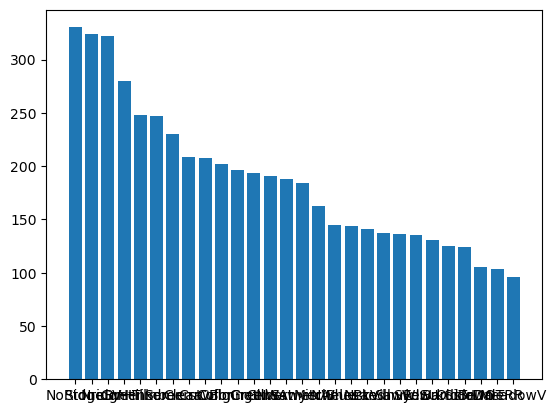

In [135]:
import matplotlib.pyplot as plt


plt.bar(mean_price.index, mean_price.to_numpy())

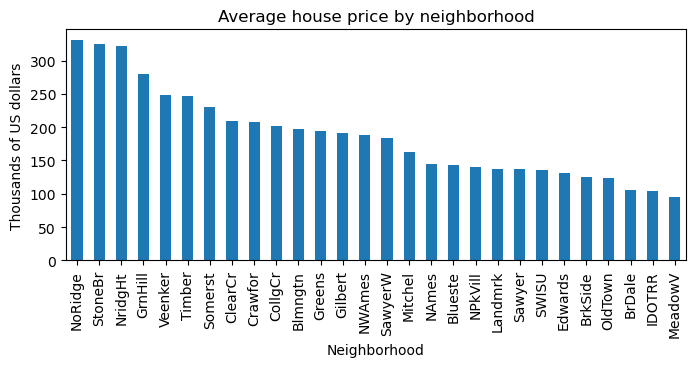

In [136]:
_ = mean_price.plot.bar(
    title='Average house price by neighborhood',
    ylabel='Thousands of US dollars',
    figsize=(8, 3)
    )

In [137]:
# Compute the dispersion of sale price by neighborhood

groups['SalePrice'].std().sort_values(ascending=False).head(3).round(1)

Neighborhood
StoneBr    119.3
NoRidge    101.4
NridgHt     95.9
Name: SalePrice, dtype: float64

In [138]:
std_price = groups['SalePrice'].std().sort_values(ascending=False)

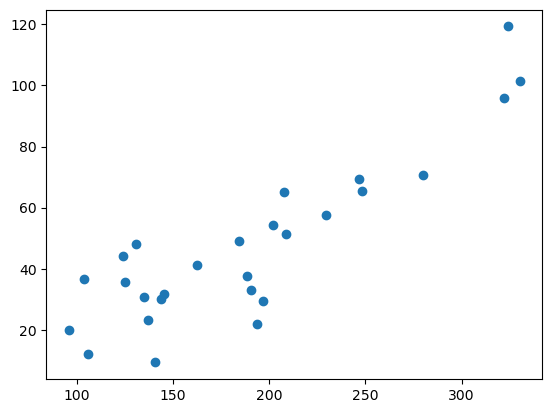

In [139]:
plt.scatter(mean_price.sort_index(), std_price.sort_index())

In [140]:
stats = df.groupby('Neighborhood')['SalePrice'].agg(['mean', 'std'])

<Axes: xlabel='mean', ylabel='std'>

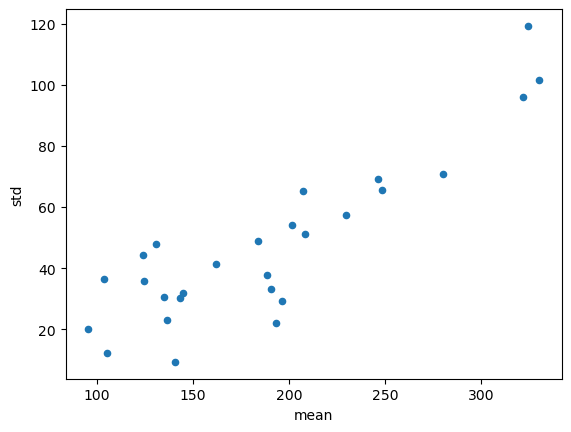

In [141]:
stats.plot.scatter(x='mean', y='std')

In [142]:
mean_price.head(5)

Neighborhood
NoRidge    330.321127
StoneBr    324.227451
NridgHt    322.019277
GrnHill    280.000000
Veenker    248.316667
Name: SalePrice, dtype: float64

In [143]:
std_price.head(5)

Neighborhood
StoneBr    119.270897
NoRidge    101.444018
NridgHt     95.934020
GrnHill     70.710678
Timber      69.327092
Name: SalePrice, dtype: float64

***
# Exercise 2: Determinants of house prices

For this exercise, we're using data on around 3,000 observations of house prices and house characteristics from Ames, a small city in Iowa,
to understand how house prices vary with selected house characteristics.

1.  Load the Ames housing data set from `ames_houses.csv` located in the `data/` folder.

    Keep only the columns `SalePrice` (price in thousands of US dollars), `LotArea` (lot area in m²), `YearBuilt`, and `Bedrooms` (number of bedrooms).

    Restrict your data set to houses with one or more bedrooms and a lot area of at least 100m².

2.  Compute the average year in which a house was built (using the column `YearBuilt`). 

    Create a new column `New` which takes on the value of 1 if the house was built 
    after the average year of construction in the sample (_"new"_), and 0 otherwise (_"old"_). 

    What is the average year of construction within these two categories?

3.  Create a new column `Rooms` which categorizes the number of `Bedrooms` into three groups: 1, 2, and 3 or more. You can create these categories using boolean indexing, [`np.where()`](https://numpy.org/doc/2.0/reference/generated/numpy.where.html), pandas's [`where()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.where.html), or some other way.

4.  Compute the mean sale price within each group formed by `New` and `Rooms` (for a total of 6 different categories).

    What is the average price difference between an old house with 1 bedroom and a new house with 3+ bedrooms?

5.  Create a figure with two subplots arranged in two columns. The left column should contain a bar chart showing
    the average house price by the number of bed rooms (1, 2, 3+) for _old_ houses, whereas the 
    right column should show the corresponding bars for _new_ houses.

In [144]:
import pandas as pd

DATA_PATH = '../../data'

filename = f'{DATA_PATH}/ames_houses.csv'

df = pd.read_csv(filename)

In [145]:
df = df[['SalePrice', 'LotArea', 'YearBuilt', 'Bedrooms']]
df = df.query('LotArea >= 100 & Bedrooms > 0')

In [146]:
print(f'Number of observations final sample: {len(df):,d}')

Number of observations final sample: 2,922


In [147]:
df.loc[(df['LotArea']>= 100) & (df['Bedrooms'] >=1)]

,SalePrice,LotArea,YearBuilt,Bedrooms
0,215.0,2951.2,1960,3
1,105.0,1079.6,1961,2
2,172.0,1325.3,1958,3
3,244.0,1036.7,1968,3
4,189.9,1284.7,1997,3
...,...,...,...,...
2925,142.5,737.3,1984,3
2926,131.0,825.4,1983,2
2927,132.0,969.9,1992,3
2928,170.0,929.9,1974,2


In [148]:
mean_year_built = df['YearBuilt'].mean()

print(mean_year_built)

1971.3302532511977


In [149]:
df['New'] = df['YearBuilt'] >= mean_year_built

In [150]:
df.groupby('New')['YearBuilt'].mean()

New
False    1945.149148
True     1995.678336
Name: YearBuilt, dtype: float64

# Part 3

In [151]:
Bedrooms = df['Bedrooms'].value_counts().sort_index()

In [152]:
df['Rooms'] = df['Bedrooms']

df.loc[df['Bedrooms'] >= 3, 'Rooms'] = 3

In [153]:
import numpy as np

df['Rooms'] = np.fmin(3, df['Bedrooms'])

In [154]:
pd.crosstab(df['Bedrooms'], df['Rooms'])

Rooms,1,2,3
Bedrooms,,,
1,112,0,0
2,0,743,0
3,0,0,1597
4,0,0,400
5,0,0,48
6,0,0,21
8,0,0,1


In [155]:
df['Rooms'] = np.where(df['Bedrooms'] < 3, df['Bedrooms'], 3)

In [168]:
mean_price = df.groupby(['New', 'Rooms'])['SalePrice'].mean()

mean_price

New    Rooms
False  1        101.417949
       2        117.512113
       3        146.528135
True   1        226.610959
       2        210.975211
       3        223.989411
Name: SalePrice, dtype: float64

In [171]:
diff = mean_price.loc[(True, 3)] - mean_price.loc[(False, 1)]

In [172]:
print(f'Difference in price: {diff:.1f}')

Difference in price: 122.6


Text(0.5, 0, 'Number of rooms')

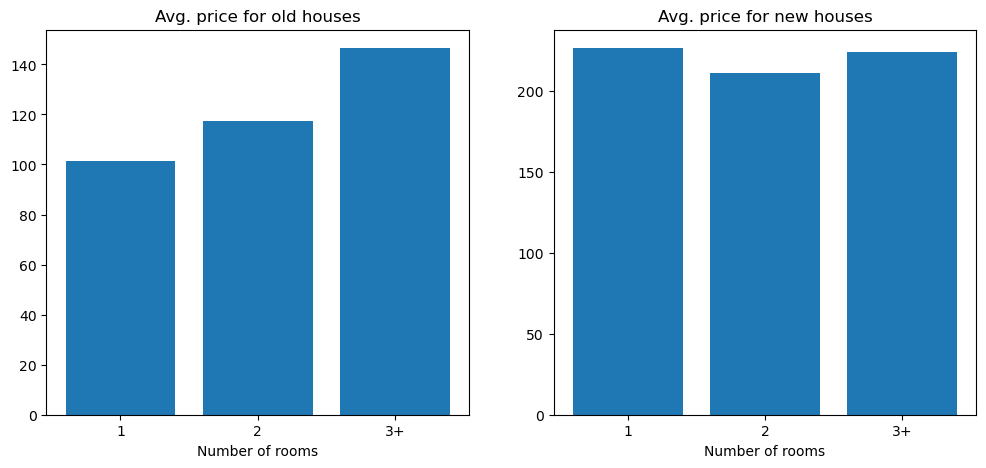

In [183]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

xvalues = ['1', '2', '3+']
axes[0].bar(xvalues, mean_price.loc[False])
axes[0].set_title('Avg. price for old houses')
axes[0].set_xlabel('Number of rooms')

axes[1].bar(xvalues, mean_price.loc[True])
axes[1].set_title('Avg. price for new houses')
axes[1].set_xlabel('Number of rooms')

***
# Exercise 3: Inflation and unemployment in the US

In this exercise, you'll be working with selected macroeconomic variables for the United States reported at monthly frequency obtained from [FRED](https://fred.stlouisfed.org/).
The data set starts in 1948 and contains observations for a total of 864 months.

1.  Load the data from the file `FRED_monthly.csv` located in the `data/FRED` folder. Print the first 10 observations to get an idea how the data looks like.
    
    Keep only the columns `Year`, `Month`, `CPI`, and `UNRATE`. Moreover, perform this analysis only on observations prior to 1970 and drop the rest.

2.  The column `CPI` stores the consumer price index (CPI) for the US. You may be more familiar with the concept of inflation, which is the percent change of the CPI relative to the previous period. 
    Create a new column `Inflation` which contains the _annual_ inflation _in percent_ relative to the same month in the previous year by applying 
    [`pct_change()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html) to the column `CPI`.

    *Hints:* 
    
    -   Since this is monthly data, you need to pass the argument `periods=12` to `pct_change()` to get annual percent changes.
    -   You need to multiply the values returned by `pct_change()` by 100 to get percent values.

3.  Compute the average unemployment rate (column `UNRATE`) over the whole sample period. Create a new column `UNRATE_HIGH` that contains an indicator whenever the unemployment rate is above its average value (_"high unemployment period"_). 
    -   How many observations fall into the high- and the low-unemployment periods?
    -   What is the average unemployment rate in the high- and low-unemployment periods?

4.  Compute the average inflation rate for high- and low-unemployment periods. Is there any difference?

    Visualize this relationship by creating a scatter plot with the unemployment rate on the $x$-axis and inflation on the $y$-axis, and assign different colors 
    to observations from the low and high unemployment periods.

5.  Use [`resample()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) to aggregate
    the inflation data to annual frequency and compute the average inflation within each calendar year.

    -   Report the three years with the highest inflation rates.
    -   Create a plot that shows the average annual inflation over the sample period.

    *Hint:* Use the resampling rule `'YE'` when calling `resample()`.
